<a href="https://colab.research.google.com/github/ITAM-DS/deep-learning/blob/colab-notebooks/codigo/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manipulacion de datos

En general utilizamos arreglos para almacenar nuestros datos. Una instancia suficientemente general son los llamdos **tensores**. Estos representan las unidades básicas de almacenamiento en aplicaciones de Aprendizaje Profundo (DL). 

Si ya has estado familiarizada con _matrices_ entonces ya has trabajado con tensores de 2 dimensiones. Los tensores son generalizaciones de tensores a mas dimensiones.

## Escalares (tensores de dimension 0) 

In [4]:
import numpy as np
x = np.array(12)
x

array(12)

In [5]:
x.ndim

0

## Vectores (tensores de dimension 1)


In [6]:
x = np.array([1, 4, 5 ,9])
x

array([1, 4, 5, 9])

In [7]:
x.ndim

1

## Matrices (tensores de dimension 2)


In [8]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [9]:
x.ndim

2

## Tensores de dimension 3

In [10]:
x = np.array([[[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]],
                  [[5, 78, 2, 34, 0],
                   [6, 79, 3, 35, 1],
                   [7, 80, 4, 36, 2]]])
x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [11]:
x.ndim

3

## Atributos clave

Un tensor tiene tres atributos clave: 

- **Rango** El número de ejes (_axis_). Lo podemos verificar con el atributo `ndim` en arreglos de `Numpy`.
- **Forma** (_Shape_) Es una tupla de enteros que describe cuantas dimensiones tiene el tensor en cada eje. La matriz anterior tiene forma `(3, 5)`, el tensor de 3 dimensiones tiene forma `(3, 3, 5)`. 
- **Tipo de datos** (_data type_) Es el tipo de datos contenido en un tensor (lo consultamos con la propiedad `dtype`). Los mas comunes son: 
`float32`, `uint8`, `float64`. 

Podemos explorar estas propiedades en un conjunto de datos clasico en DL. 

In [12]:
from tensorflow.keras.datasets import mnist

In [13]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [14]:
print('Rank      :   %i'%train_images.ndim)
print('Shape     : (%i, %i, %i)'%train_images.shape)
print('Data type : %s'%train_images.dtype)

Rank      :   3
Shape     : (60000, 28, 28)
Data type : uint8


### En la practica

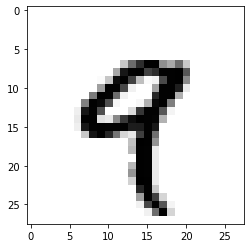

In [15]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)

In [16]:
print('Rank      : %i'%digit.ndim)
print('Shape     : (%i, %i)'%digit.shape)
print('Data type : %s'%digit.dtype)

Rank      : 2
Shape     : (28, 28)
Data type : uint8


## Operaciones de corte (_slicing_)

In [18]:
my_slice_1 = train_images[0:100]
print(my_slice_1.shape)

(100, 28, 28)


In [20]:
my_slice_2 = train_images[0:100, :, :]
print(my_slice_2.shape)

(100, 28, 28)


In [22]:
my_slice_3 = train_images[0:100, 0:28, 0:28]
print(my_slice_3.shape)

(100, 28, 28)


In [23]:
print((my_slice_1 == my_slice_2).all())
print((my_slice_1 == my_slice_3).all())
print((my_slice_3 == my_slice_2).all())

True
True
True


## Bloques de datos

In [24]:
batch = train_images[:128]
print(batch.shape)

(128, 28, 28)


In [25]:
batch = train_images[128:256]
print(batch.shape)

(128, 28, 28)


In [35]:
batch_size = 128
batch_images = train_images[:1024].reshape(-1, 128, 28, 28)
print(batch_images.shape)

(8, 128, 28, 28)


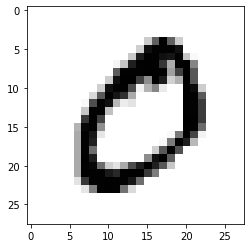

In [39]:
batch_num = 0
image_num = 1
plt.imshow(batch_images[batch_num, image_num], cmap = plt.cm.binary)

## Ejemplos


- **Datos en vectores** tensores de 2D (observaciones, atributos)
- **Series de tiempo o datos secuenciales** Tensores de 3D (observaciones, tiempo, atributos)
- **Imagenes** Tensores de 4D (observaciones, alto, ancho, canal) o (observaciones, canal, alto, ancho)
- **Video** Tensores de 5D (observaciones, _frames_, alto, ancho, canal) o (observaciones, _frames_, canal, alto, ancho)


¿Cuál sería la forma de guardar en un tensor un video de 60 segundos de YouTube de resolucion $144 \times 256,$ muestreado a 4 imagenes por segundo?

¿Cuál es el tamaño aproximado si se guarda en un tensor con `dtype` igual a `float32`?